In [2]:
import cv2
import matplotlib.pyplot as plt

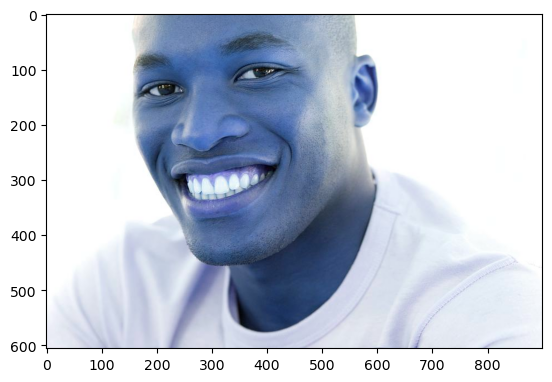

In [7]:
img_bgr = cv2.imread(r"C:\Users\abhis\Downloads\Deep Learning lab\face_classification\happy_person_face\9-happy-man-ian-hootonscience-photo-library.jpg")


plt.imshow(img_bgr)

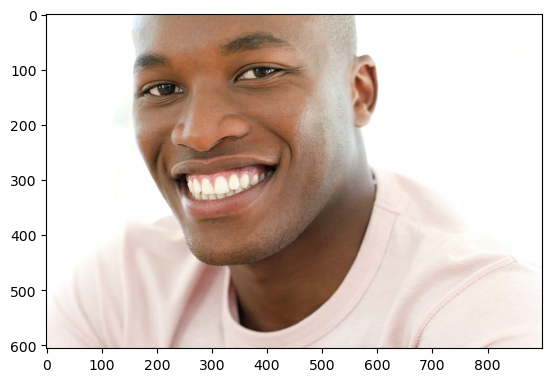

In [8]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

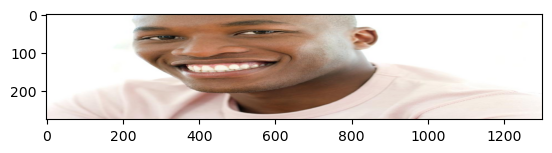

In [10]:
img = cv2.resize(img_rgb, (1300, 275))
plt.imshow(img)

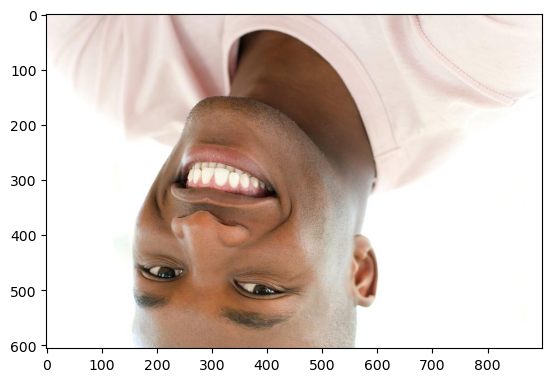

In [11]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
new_img = cv2.flip(img_rgb, 0)
plt.imshow(new_img)

# **flip through Y- Axis**

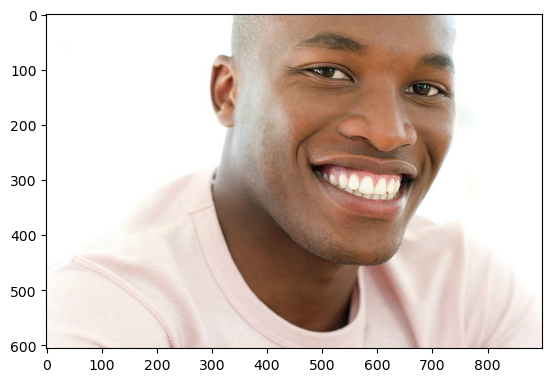

In [12]:
new_img = cv2.flip(img_rgb, 1)
plt.imshow(new_img)

# **Blending**

In [16]:
img1 = cv2.imread(r"C:\Users\abhis\Downloads\Deep Learning lab\face_classification\happy_person_face\9-happy-man-ian-hootonscience-photo-library.jpg")
img2 = cv2.imread(r"C:\Users\abhis\Downloads\do-not-copy-160137_1280.png")

img1.shape

(606, 900, 3)

In [17]:
img2.shape

(1280, 1277, 3)

In [18]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

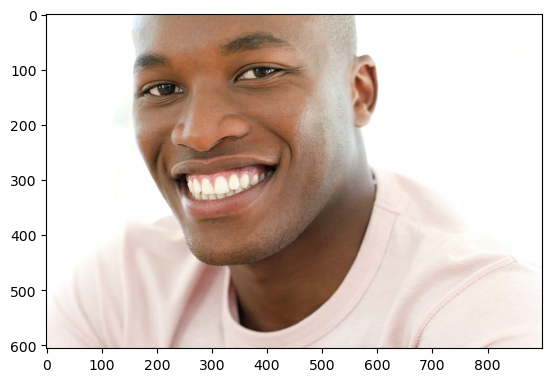

In [19]:
plt.imshow(img1)

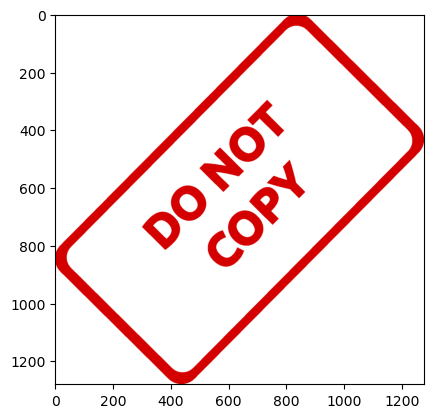

In [21]:
plt.imshow(img2)

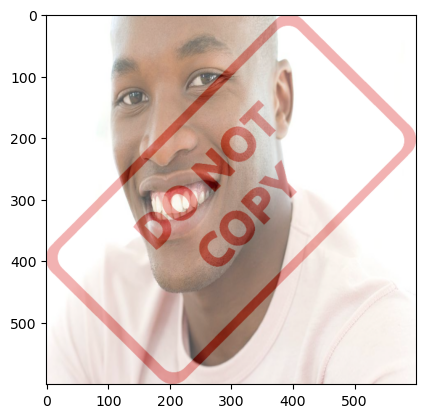

In [22]:
img1 = cv2.resize(img1, (600, 600))
img2 = cv2.resize(img2, (600, 600))
blended = cv2.addWeighted(src1 =img1, alpha =0.7, src2 = img2, beta = 0.3, gamma = 0)
plt.imshow(blended)

# **Creating a region of Interest ROI**

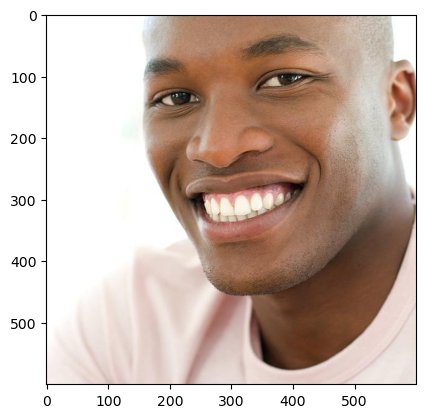

In [36]:
img1 = cv2.imread(r"C:\Users\abhis\Downloads\Deep Learning lab\face_classification\happy_person_face\9-happy-man-ian-hootonscience-photo-library.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# plt.imshow(img1)
img1.shape
x_offset = 934-600
y_offset = 1401-600
# creating an ROI of the same size as the foreground image (smaller image that will go on top)
rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols] # Top left corner
# roi = img1[y_offset:1401, x_offset:934] # Bottom right corner
plt.imshow(roi)

# **Image Thresholding**

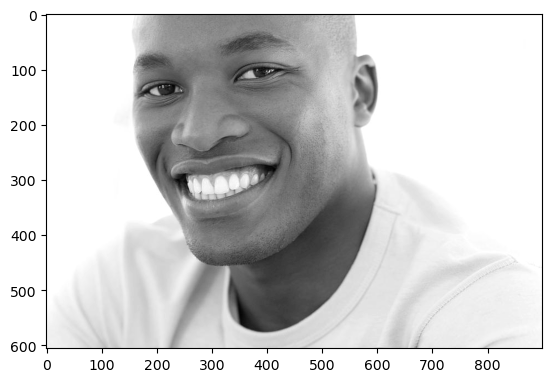

In [ ]:
gray_image = cv2.imread(r"C:\Users\abhis\Downloads\Deep Learning lab\face_classification\happy_person_face\9-happy-man-ian-hootonscience-photo-library.jpg", cv2.IMREAD_GRAYSCALE) # in place of cv2.IMREAD_GRAYSCALE we can also use 0
plt.imshow(gray_image, cmap='gray') 

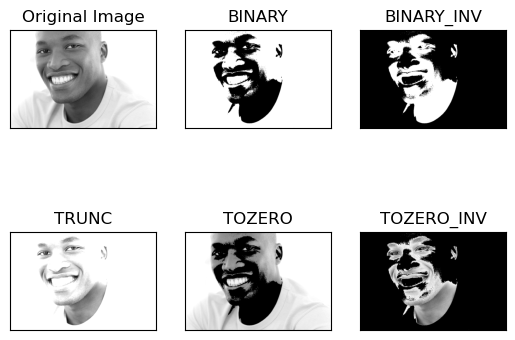

In [47]:
ret, thresh_binary = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
ret, thresh_binary_inv = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh_trunc = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TRUNC)
ret, thresh_tozero = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TOZERO)
ret, thresh_tozero_inv = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TOZERO_INV)


names = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [gray_image, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(names[i])
    plt.xticks([]), plt.yticks([])
plt.show()

# **Blurring**

**Average Bluring**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


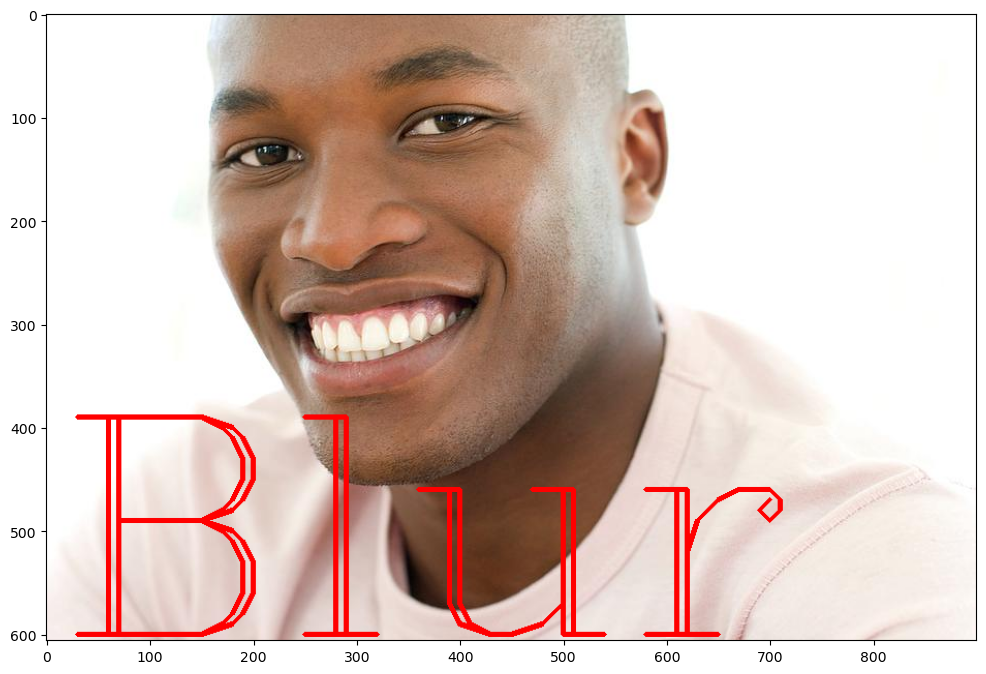

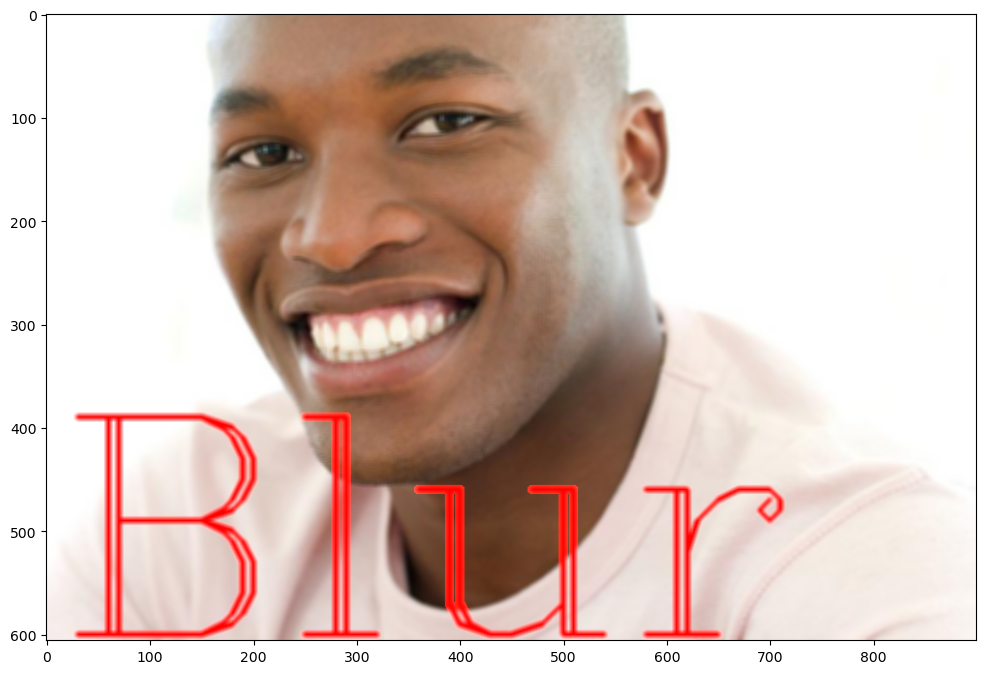

In [ ]:
import numpy as np
def load_image(path):
    img = cv2.imread(path).astype(np.float32) / 255.0
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
def display_image(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

# Average Blurring
img = load_image(r"C:\Users\abhis\Downloads\Deep Learning lab\face_classification\happy_person_face\9-happy-man-ian-hootonscience-photo-library.jpg")
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img, text = 'Blur', org = (10,600), fontFace = font, fontScale = 10, color = (255,0,0), thickness = 4)
display_image(img)

blurred = cv2.blur(img, ksize=(5,5))
display_image(blurred)

**Gaussian Blurring**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


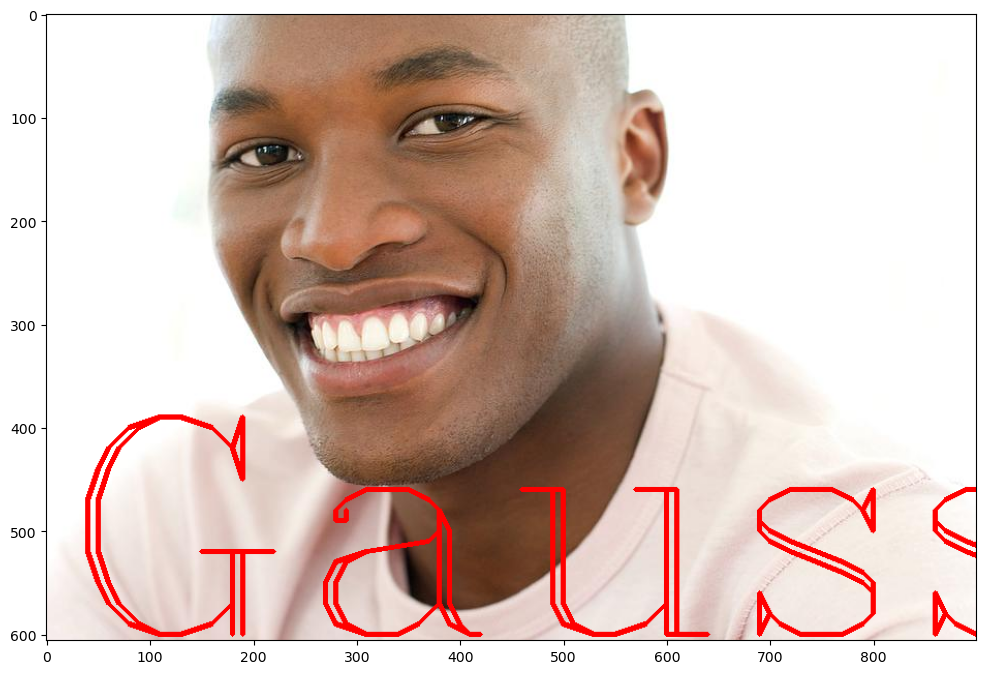

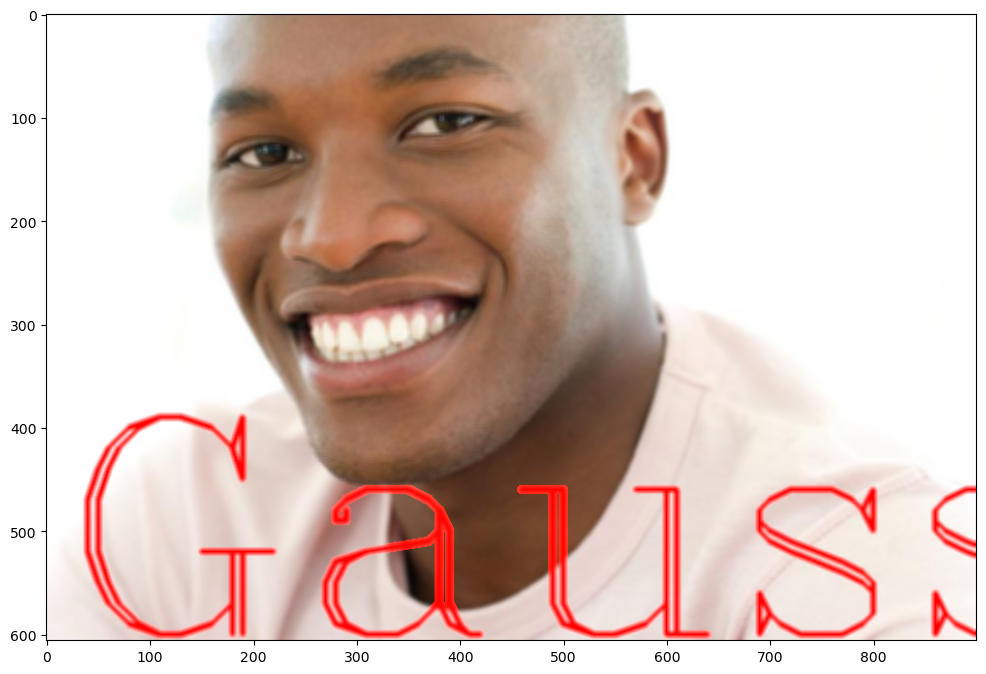

In [52]:
def load_image(path):
    img = cv2.imread(path).astype(np.float32) / 255.0
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def display_image(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

# Gaussian Blurring
img = load_image(r"C:\Users\abhis\Downloads\Deep Learning lab\face_classification\happy_person_face\9-happy-man-ian-hootonscience-photo-library.jpg")
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img, text = 'Gaussian Blur', org = (10,600), fontFace = font, fontScale = 10, color = (255,0,0), thickness = 4)
display_image(img)

gaussian_blurred = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=10)
display_image(gaussian_blurred)

# **Edge Detection using Canny Edge Detector**

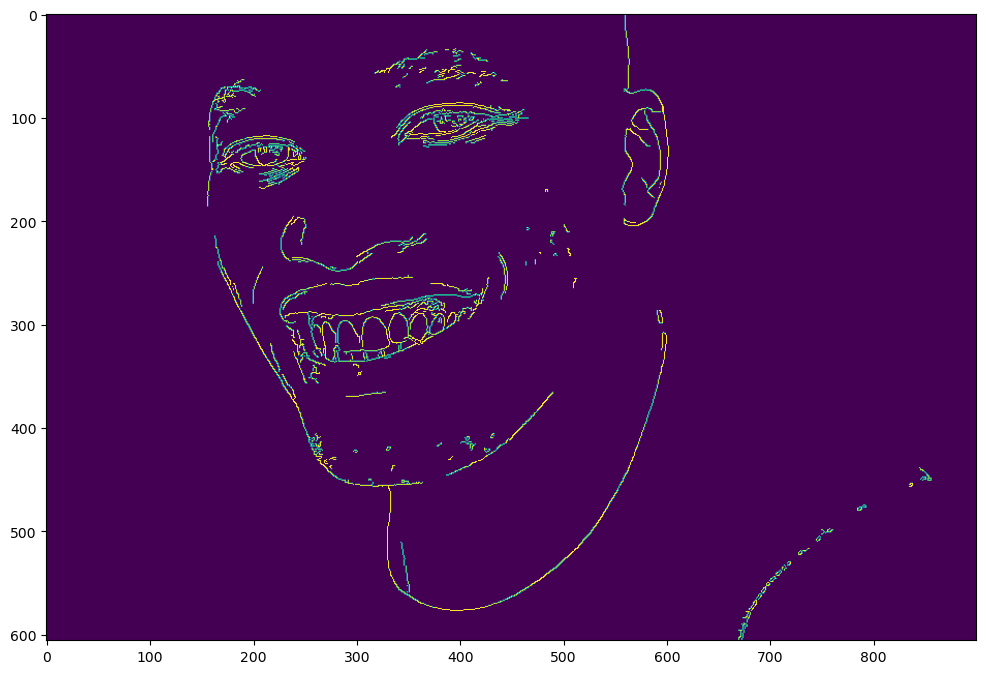

In [55]:
def display_image(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)
image = cv2.imread(r"C:\Users\abhis\Downloads\Deep Learning lab\face_classification\happy_person_face\9-happy-man-ian-hootonscience-photo-library.jpg")
edges = cv2.Canny(image, threshold1=100, threshold2=200)
display_image(edges)

# **Image Contours**

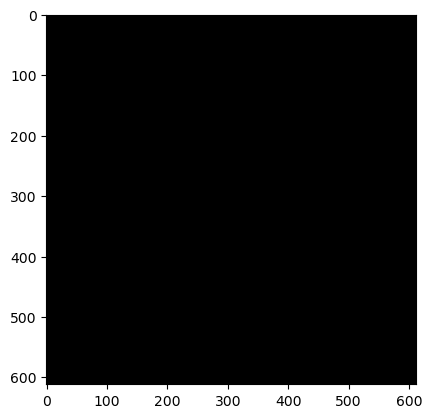

In [82]:
img = cv2.imread(r"C:\Users\abhis\Downloads\istockphoto-1443335942-612x612.jpg",0)
contours, hierarchy = cv2.findContours(img, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

# Draw External Contours

# Set up empty array
external_contours = np.zeros(img.shape)

# For every entry in contours
for i in range(len(contours)):

    # last column in array is -1 if an external contour (no contour inside of it)
    if hierarchy[0][i][3] == -1: 

        # Draw the contour on the empty array
        cv2.drawContours(external_contours, contours, i, 255, -1)
plt.imshow(external_contours, cmap='gray')

# **Face Detection using Haar Cascade Classifier**

In [ ]:
import os
print(os.path.exists(r"C:\Users\abhis\Downloads\Deep Learning lab\face_classification\happy_person_face\9-happy-person-face.jpg"))

False


*If it is false then the path is wrong or the file is missing*

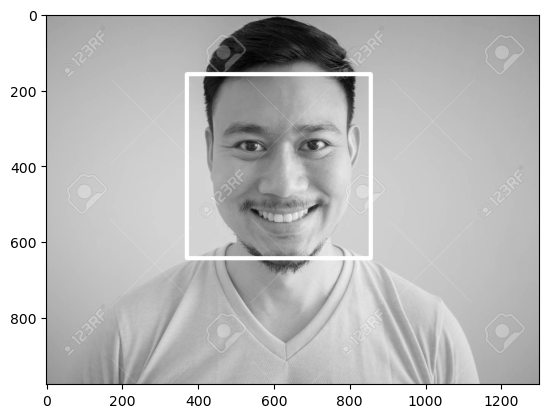

In [105]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
denis = cv2.imread(r"C:\Users\abhis\Downloads\Deep Learning lab\face_classification\happy_person_face\77087478-headshot-of-happy-face-of-asian-man-with-beard-and-mustache.jpg",0)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_face(img):
    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255), 10)
    return face_img
result = detect_face(denis)
plt.imshow(result,cmap='gray')